In [21]:
import os
import numpy as np
import pickle
from tqdm.notebook import tqdm
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [80]:
AxoGidToXY = pickle.load(open(os.environ['HOME'] + '/AxoGidToXY.p','rb'),encoding='latin1')
def create_normalization_factor(vari):# { LOCAL temps,temps1, precision : I need to think how can I change this code so that changing the vari.
    temps  = 0
    temps1 = 0
    precision =10000
    for i in range(0,precision):
        temps  = temps +  (np.sin( (1.5+(i/precision)*2)  * np.pi)+1)*(1/precision)
        temps1 = temps1 + (( (np.sin((1.5+(i/precision)*2)* np.pi)+1))**vari)*(1/precision)

    factor = temps/temps1   
    return(factor)

axon_spontanues_firing_rate =0
axon_stim_firing_rate = 1.5
vari = 1
factor = create_normalization_factor(vari)
phase = 0
freq = 10

mod_freq1 = freq * 2  * np.pi/1000.0


stim_end_time = 3000
    


def fr_function(t):
    return (axon_spontanues_firing_rate + factor*axon_stim_firing_rate*((np.sin((t+phase)*mod_freq1-0.5*np.pi)+1)**vari))/1000.0



def create_thalamic_spikes(fr_function, stim_end_time, seed):
    print('creating spike times - START')
    thalamic_rnd = np.random.RandomState(seed)
    sp_per_axon_gid = {}
    for axon_gid in tqdm(AxoGidToXY.keys()):
        spike_times = []
        t = 0 
        lamd = max_firing_rate #Do I need to multiply in 2?? I can multiply just to make sure, but it will make everything slow
        while (t<=stim_end_time):#{ :this Algorithm is from http://freakonometrics.hypotheses.org/724  from this paper. http://filebox.vt.edu/users/pasupath/papers/nonhompoisson_streams.pdf
            u = thalamic_rnd.uniform()
            t = t - np.log(u)/lamd
            if t<=stim_end_time:
                if thalamic_rnd.uniform() <= fr_function(t)/lamd:
                    invl=t
                    spike_times.append(invl)
        sp_per_axon_gid[axon_gid] = spike_times
    print('creating spike times - END')
    return(sp_per_axon_gid)


In [81]:
aa = create_thalamic_spikes(fr_function,3000,10)

creating spike times - START



creating spike times - END


<BarContainer object of 100 artists>

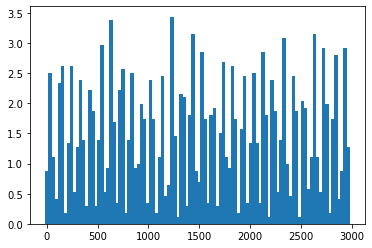

In [82]:
vals, bins = histogram([i for j in aa.values() for i in j],100)

bar(bins[:-1],vals/len(aa.values())/(bins[1]-bins[0])*1000,width=35)

In [77]:
vals

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
histogram([i for j in aa.values() for i in j],100)

(array([  23,   18,   19,   37,  115,  329,  659,  954, 1035,  730,  421,
         177,   50,   20,   22,   19,   14,   26,   13,   20,   47,  136,
         399,  784, 1086, 1024,  682,  301,  112,   26,   13,   22,   22,
          27,   19,   14,   24,   61,  199,  496,  864, 1028,  895,  503,
         240,   62,   29,   18,   20,   18,   10,   26,   23,   22,   89,
         270,  621,  935, 1037,  829,  454,  157,   45,   17,   14,   19,
          19,   23,   13,   25,   38,  124,  393,  745, 1015,  954,  721,
         336,  136,   36,   23,   18,   20,   16,   10,   16,   21,   55,
         160,  433,  780, 1099,  916,  574,  258,   80,   21,   14,   10,
          19]),
 array([   5.81679667,   35.74482787,   65.67285906,   95.60089025,
         125.52892145,  155.45695264,  185.38498384,  215.31301503,
         245.24104623,  275.16907742,  305.09710862,  335.02513981,
         364.95317101,  394.8812022 ,  424.80923339,  454.73726459,
         484.66529578,  514.59332698,  544.521